# Build the predictive model to predict the lung capacity of the humans and also check if assumptions hold true.

# Author- Rohan Kulkarni

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/_RoXstaR_/OneDrive/Desktop/LungCapData.csv')

In [3]:
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


#### Assumptions:
        1. Linear Relationship betn dep and indep vars.
        2. Min. Multicollinarity
        3. Error is Normally distributed 
        4. There is Homoscedacity

In [5]:
df.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df.Smoke=le.fit_transform(df.Smoke)
df.Gender=le.fit_transform(df.Gender)
df.Caesarean=le.fit_transform(df.Caesarean)

In [9]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


##### Split

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
df_train,df_test= train_test_split(df, test_size= .2)

In [14]:
df_train_X=df_train.iloc[: , 1:6]
df_train_y=df_train.iloc[: , 0]

In [15]:
df_test_X=df_test.iloc[: , 1:6]
df_test_y=df_test.iloc[: , 0]

### Model building steps
     1.Import somethings (some functions of sklearn)
     2. Create object of it
     3. Run fit to create a model
     4. learn predict to predict

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit( df_train_X, df_train_y)

LinearRegression()

In [20]:
pred_train=lr.predict(df_train_X)
pred_test=lr.predict(df_test_X)

In [26]:
lr.coef_ # coef will be in same order as we mentioned during training.

array([ 0.15610986,  0.27073178, -0.61778873,  0.36666078, -0.21642916])

In [25]:
df_train_X.columns

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [24]:
lr.intercept_

-11.66334473399371

In [27]:
R_square=lr.score(df_train_X, df_train_y)
R_square

0.8527021389216045

In [30]:
N= df_train_X.shape[0]
K= df_train_X.shape[1]

adj_R= 1 - (1- R_square) * ( N-1 ) / ( N-K-1 )
adj_R

0.8514190565080296

In [36]:
# lets check the assumptions
pred_train=lr.predict(df_train_X)
pred_test=lr.predict(df_test_X)
# we didn't do prediction on y values

In [34]:
error_train=df_train_y - pred_train
error_test=df_test_y -  pred_test


In [35]:
error_train.mean()

-2.4179891805284443e-15

In [52]:
error_test.head(10)

288   -1.655761
153   -0.086148
535    0.833230
302    0.122898
568   -1.030989
634   -1.386843
660    0.464728
298   -0.124723
420    1.244534
673   -1.235151
Name: LungCap, dtype: float64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  1.,  10.,  35.,  83., 115., 139., 113.,  63.,  17.,   4.]),
 array([-3.37401514, -2.73601017, -2.09800521, -1.46000024, -0.82199527,
        -0.18399031,  0.45401466,  1.09201963,  1.7300246 ,  2.36802956,
         3.00603453]),
 <a list of 10 Patch objects>)

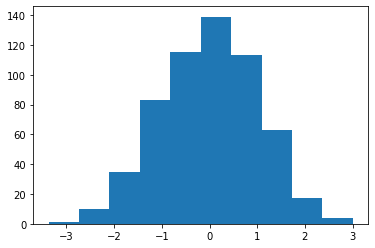

In [41]:
plt.hist(error_train)

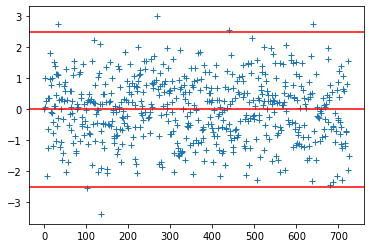

In [43]:
plt.plot(error_train,'+')
plt.axhline(y = error_train.mean(),color='r')
plt.axhline(y = 2.5,color='r')
plt.axhline(y = -2.5,color='r')

In [46]:
# create dataframe of actual and predicted
pred_actual=pd.DataFrame({'Pred':pred_train, 'Actual': df_train_y})

In [47]:
pred_actual.head(10)

,Pred,Actual
425,7.226639,5.875
371,7.076858,7.700
386,6.474919,5.150
355,9.820953,7.750
516,7.657759,8.275
708,8.140503,6.900
69,8.986396,7.900
570,11.662224,11.900
113,4.305552,5.875
525,8.857359,8.350


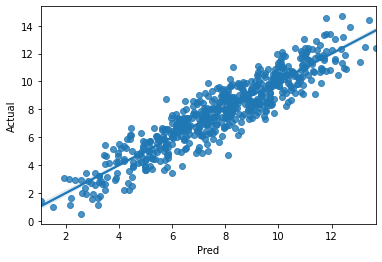

In [49]:
sns.regplot(pred_actual.Pred,pred_actual.Actual)

In [50]:
# let's find out other metrics(MAE, MSE, RMSE, MAPE)
#on test data


In [58]:
MAE=np.mean(np.abs(error_test))
MAE

0.8140438352506795

In [57]:
MSE=np.mean(np.abs(error_test))
MSE

0.8140438352506795

In [59]:
RMSE=np.sqrt(MSE)
RMSE

0.9022437781723294

In [60]:
MAPE=np.mean(np.abs(error_test*100/ df_test_y))
MAPE

12.518340676457532

In [61]:
Accuracy=100-MAPE
Accuracy

87.48165932354247